# Conhecendo a base de dados

## Importando os dados


In [72]:
import pandas as pd

In [73]:
url = ("aluguel.csv")

In [74]:
df = pd.read_csv("aluguel.csv")

In [75]:
# --- PASSO 0: Carregar os Dados ---
# Usamos o separador ';' (ponto e vírgula)
df = pd.read_csv(url, sep=";")

In [76]:
# --- PASSO 1: Limpeza da Variável-Alvo e Outliers de Qualidade ---
# 1.1. Remover Linhas com 'Valor' Ausente (NaN)
df_limpo = df.dropna(subset=['Valor'])

In [77]:
# 1.2. Remover Outliers óbvios na 'Area' (Área = 0)
df_limpo = df_limpo[df_limpo['Area'] > 0]

In [78]:
# --- PASSO 2: Filtragem de Tipos de Imóveis (Foco Residencial) ---
tipos_residenciais = [
    'Apartamento', 'Casa', 'Casa de Condomínio', 'Quitinete',
    'Casa de Vila', 'Loft', 'Studio', 'Flat'
]

In [79]:
# Aplicar o filtro
df_residencial = df_limpo[df_limpo['Tipo'].isin(tipos_residenciais)].copy()

In [80]:
# --- PASSO 3: Tratamento de valores ausentes em Condomínio e IPTU
# 3.1 Preencher valores ausentes (Nan) com 0
df_residencial['Condominio'] = df_residencial['Condominio'].fillna(0)
df_residencial['IPTU'] = df_residencial['IPTU'].fillna(0)

In [81]:
# --- 3.2 Converter as colunas para o tipo (int)
df_residencial['Condominio'] = df_residencial['Condominio'].astype(int)
df_residencial['IPTU'] = df_residencial['IPTU'].astype(int)

In [82]:
# --- PASSO 4: Remoção de Outliers na variável 'Valor' (Aluguel)
# 4.1 Calcular os quartis e o IQR
Q1 = df_residencial['Valor'].quantile(0.25)
Q3 = df_residencial['Valor'].quantile(0.75)
IQR = Q3 - Q1

In [83]:
# 4.2 Definir o limite superior (Q3 + 1.5 * IQR)
limite_superior = Q3 + 1.5 * IQR

In [84]:
# 4.3 Filtrar o DataFrame, mantendo apenas os valores abaixo do limite
df_final = df_residencial[df_residencial['Valor'] <= limite_superior]

In [85]:
# --- Passo 5: Verificação e Salvamento de Resultado
print("--- Estatísticas Finais de 'Valor' após limpeza completa ---")
print(df_final['Valor'].describe().round(2).to_string())

print(f"\nTotal de Registros Final: {df_final.shape[0]}")

--- Estatísticas Finais de 'Valor' após limpeza completa ---
count    20922.00
mean      3198.60
std       2324.22
min        100.00
25%       1500.00
50%       2500.00
75%       4200.00
max      10900.00

Total de Registros Final: 20922


In [86]:
# Salvar o DataFrame final limpo
df_final.to_csv('aluguel_final_limpo_reexecutado.csv', index=False, sep=';')

In [87]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [88]:
df.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [89]:
df.sample()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
19676,Apartamento,Copacabana,1,0,0,45,1200.0,600.0,58.0


## Características gerais da base de dados

In [90]:
type(df)

pandas.core.frame.DataFrame

In [91]:
df.shape

(32960, 9)

In [92]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

* Tipo: tipo de imóvel;
* Bairro: bairro em que está localizado;
* Quartos: número de quartos;
* Vagas: número de vagas de garagem;
* Suites: número de suítes;
* Area: área do imóvel em metros quadrados;
* Valor: valor do imóvel;
* Condominio: valor mensal do condomínio;
* IPTU: valor do IPTU.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


![Alt text](variaveis.png)

# Análise exploratória de dados

In [94]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False
32958,False,False,False,False,False,False,False,False,True


In [95]:
df.shape

(32960, 9)

In [96]:
display(df)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [97]:
Dataframe = pd.DataFrame(df)

In [98]:
display(Dataframe)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [99]:
display(df.columns)

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [100]:
display(df.index)

RangeIndex(start=0, stop=32960, step=1)

In [101]:
display(df.describe())

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [102]:
print(df.loc[1:4])

                      Tipo           Bairro  Quartos  Vagas  Suites  Area  \
1                     Casa  Jardim Botânico        2      0       1   100   
2  Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
3              Apartamento           Centro        1      0       0    15   
4              Apartamento     Higienópolis        1      0       0    48   

    Valor  Condominio    IPTU  
1  7000.0         NaN     NaN  
2  5200.0      4020.0  1111.0  
3   800.0       390.0    20.0  
4   800.0       230.0     NaN  


In [103]:
df.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

## Qual o valor médio de aluguel por tipo de imóvel?

In [104]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [105]:
# 1 D = []
type(df['Tipo'])

pandas.core.series.Series

In [106]:
# 2 D = [[]]
df[['Tipo','Valor']]

,Tipo,Valor
0,Quitinete,1700.0
1,Casa,7000.0
2,Conjunto Comercial/Sala,5200.0
3,Apartamento,800.0
4,Apartamento,800.0
...,...,...
32955,Quitinete,800.0
32956,Apartamento,1800.0
32957,Apartamento,1400.0
32958,Apartamento,3000.0


In [107]:
df['Valor']

0        1700.0
1        7000.0
2        5200.0
3         800.0
4         800.0
          ...  
32955     800.0
32956    1800.0
32957    1400.0
32958    3000.0
32959    6500.0
Name: Valor, Length: 32960, dtype: float64

In [108]:
# calculando a média da coluna valor
df['Valor'].mean()

np.float64(12952.659715265761)

In [109]:
# Método groupby()
# vocês vão enfrentar um erro - será aplicado
# solução - aplicar apenas em colunas numéricas numeric_only=True
# versão 1.0 (calculava a média automáticamente)
# versão 2.3.3 (exige especificar colunas numéricas)

df.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [110]:
# coluna númerica (quantitativa) específica
df.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [111]:
type(df.groupby('Tipo')['Valor'].mean())

pandas.core.series.Series

In [112]:
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [113]:
type(df.groupby('Tipo')[['Valor']].mean().sort_values('Valor'))

pandas.core.frame.DataFrame

In [114]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values("Valor")

In [115]:
! pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


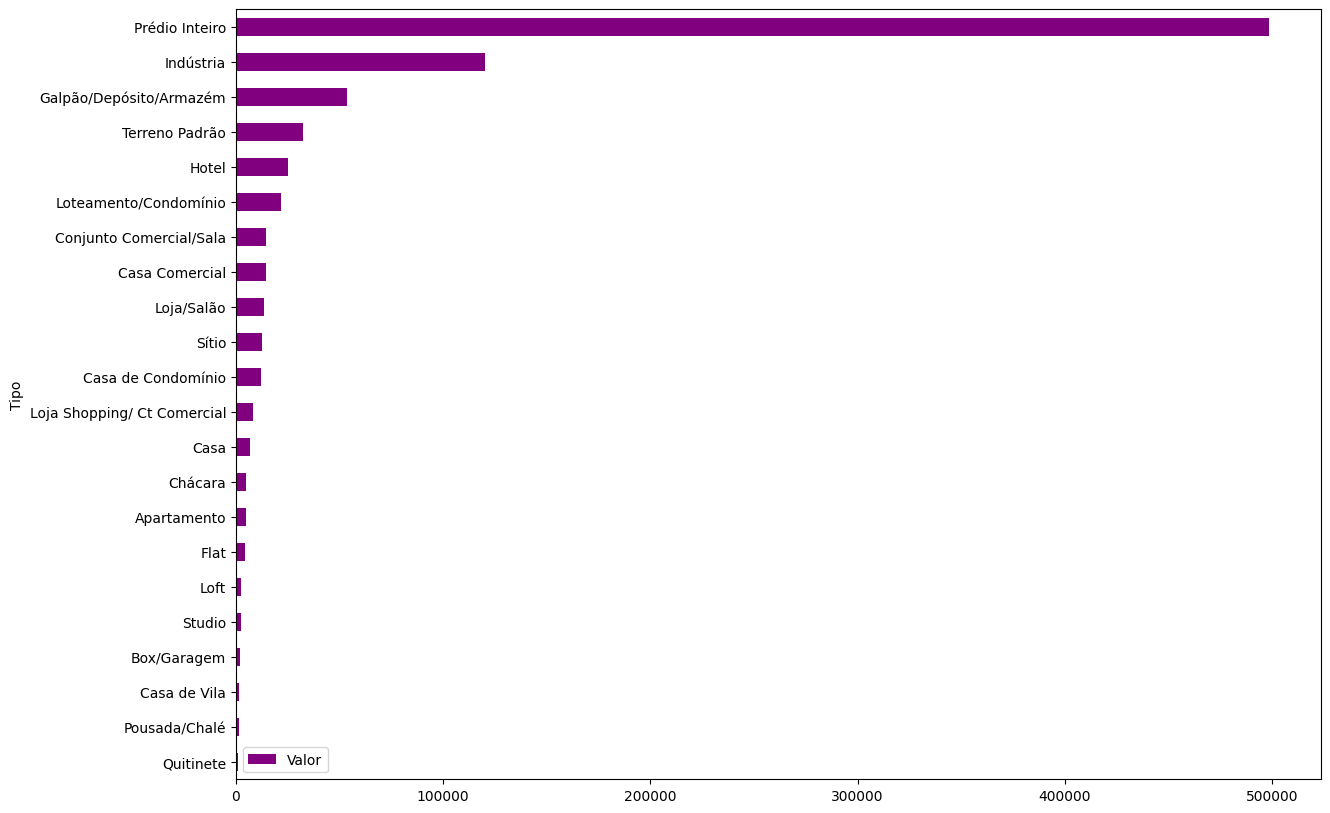

In [116]:
# plotando o gráfico de barras horizontais
# kind='barh'
# figsize=(14,10) - largura e altura do gráfico
# pixels - 1400 px de largura e 1000 px de altura
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

In [117]:
df.shape

(32960, 9)

🏡 Decisão Estratégica: Segmentação da Base de Dados
* Após a Análise Exploratória de Dados (AED), notamos uma variação significativa nos preços médios dos aluguéis quando agrupados por Tipo de imóvel.

🚨 O Problema: Mistura de Imóveis Residenciais e Comerciais
* A disparidade de valores não é um erro nos dados, mas sim um reflexo de categorias fundamentalmente distintas na mesma base:

* Imóveis Residenciais: Apartamentos, Casas, Quitinetes, etc.
* Imóveis Comerciais: Conjunto Comercial/Sala, Hotéis, etc.

📉 Impacto no Modelo de Machine Learning (ML)
* Misturar essas categorias na mesma base para um único modelo de precificação compromete drasticamente o aprendizado:

* Performance Fraca: O modelo terá dificuldade em aprender padrões específicos, resultando em um "meio-termo" que não precifica bem nem imóveis residenciais, nem comerciais.
* Diferença de Features: As variáveis que influenciam o preço são exclusivas para cada tipo:
    * Residencial: Número de quartos, vagas de garagem, área de lazer.
    * Comercial: Localização comercial, fluxo de pessoas, estrutura para negócios.

✨ Solução Proposta: Segmentação da Base
* A melhor prática é segmentar a base de dados em duas partes distintas.

    * Tipo de Base	* Objetivo	* Benefício para o ML
* Residencial	Precificação de Aluguéis para Moradia.	Permite a criação de um modelo especializado e mais preciso.
* Comercial	Análise e Precificação para Negócios.	Utiliza features específicas e relevantes, otimizando o aprendizado.

📌 Conclusão: Esta segmentação é uma etapa de limpeza de dados e *feature engineering*** que atende diretamente às **Demandas de ML do nosso Trello, garantindo dados de alta qualidade para o treinamento dos modelos.

## Removendo os imóveis comerciais

In [118]:
# Para visualizarmos os tipos únicos presentes nessa coluna
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [119]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [120]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [121]:
# crie uma lista com os tipos comerciais
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [122]:
# filtre o DataFrame dados retornando apenas os imóveis comerciais
df.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [123]:
df.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [124]:
df_dados_remove = df.query('@imoveis_comerciais not in Tipo')

In [125]:
df_dados_remove

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [126]:
df_dados_remove.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [127]:
df_dados_remove.shape

(23111, 9)

In [128]:
df_dados_remove.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

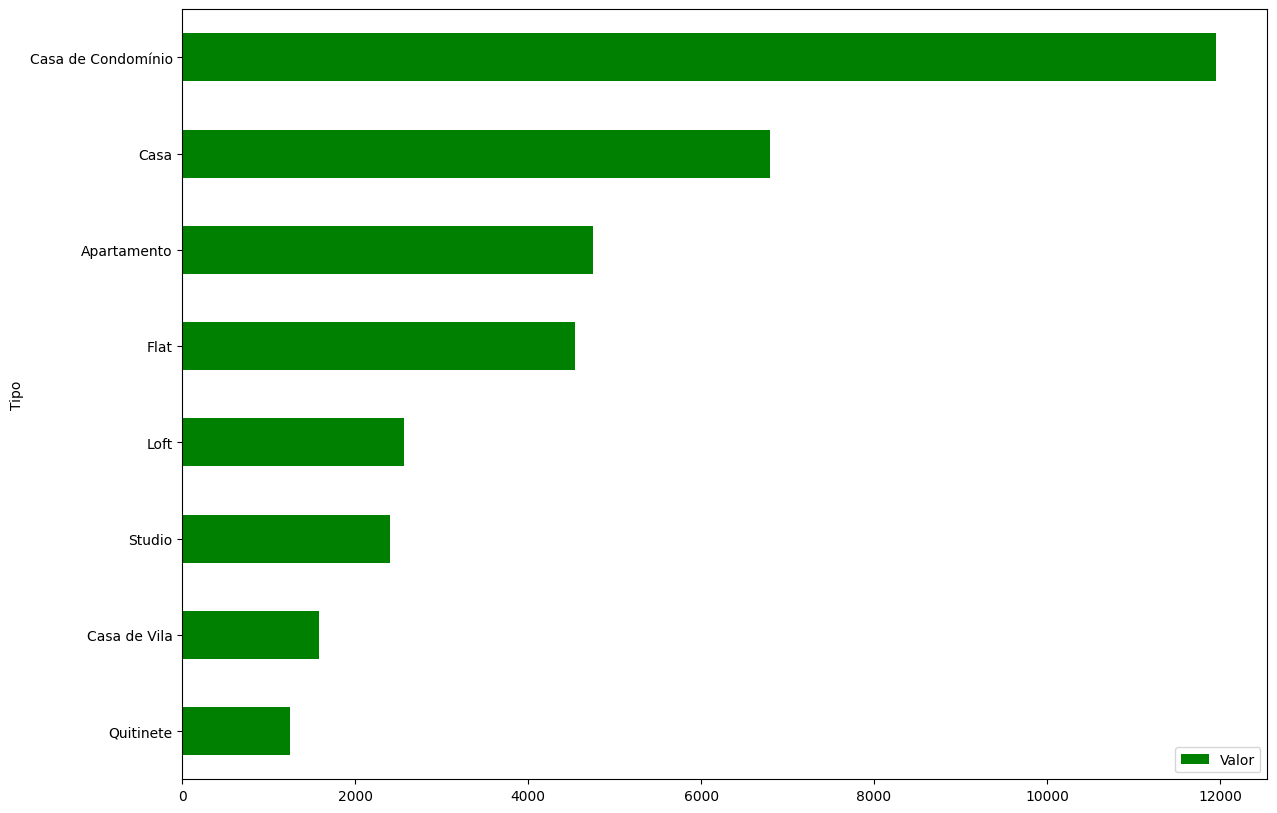

In [129]:
df_preco_tipo = df_dados_remove.groupby('Tipo')[["Valor"]].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='green');

In [132]:
# filtre imoveis comerciais cujo valor esta IPTU esta NaN
df.query('@imoveis_comerciais in Tipo and IPTU.isna()')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
35,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,22,700.0,NaN,NaN
38,Conjunto Comercial/Sala,Centro,0,5,0,1306,117540.0,19486.0,NaN
42,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,1,0,50,1500.0,250.0,NaN
...,...,...,...,...,...,...,...,...,...
32912,Conjunto Comercial/Sala,Taquara,0,1,0,36,1500.0,NaN,NaN
32914,Loja/Salão,Campo Grande,0,0,0,160,2650.0,NaN,NaN
32926,Conjunto Comercial/Sala,Bangu,0,0,0,24,800.0,500.0,NaN
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN


In [134]:
df_dados_remove.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [136]:
# consulte o total de imóveis comerciais com valor de alguel acima de 10000
df.query('@imoveis_comerciais in Tipo and Valor > 10000').shape

(2864, 9)

In [137]:
# tem como mostrar esses imóveis?
df.query('@imoveis_comerciais in Tipo and Valor > 10000')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
38,Conjunto Comercial/Sala,Centro,0,5,0,1306,117540.0,19486.0,NaN
46,Conjunto Comercial/Sala,Centro,0,0,0,1170,140456.0,23409.0,5852.0
80,Galpão/Depósito/Armazém,Vargem Grande,0,6,0,2236,40000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32899,Galpão/Depósito/Armazém,Bonsucesso,0,0,0,3200,18000.0,NaN,NaN
32913,Conjunto Comercial/Sala,Centro,0,0,0,423,11000.0,8082.0,1977.0
32923,Conjunto Comercial/Sala,Barra da Tijuca,0,16,0,430,31000.0,117471.0,22873.0
32928,Loja/Salão,Leblon,0,0,0,68,25000.0,NaN,1113.0


In [138]:
df.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [139]:
df_dados_remove = df.query('@imoveis_comerciais not in Tipo')
df_dados_remove.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


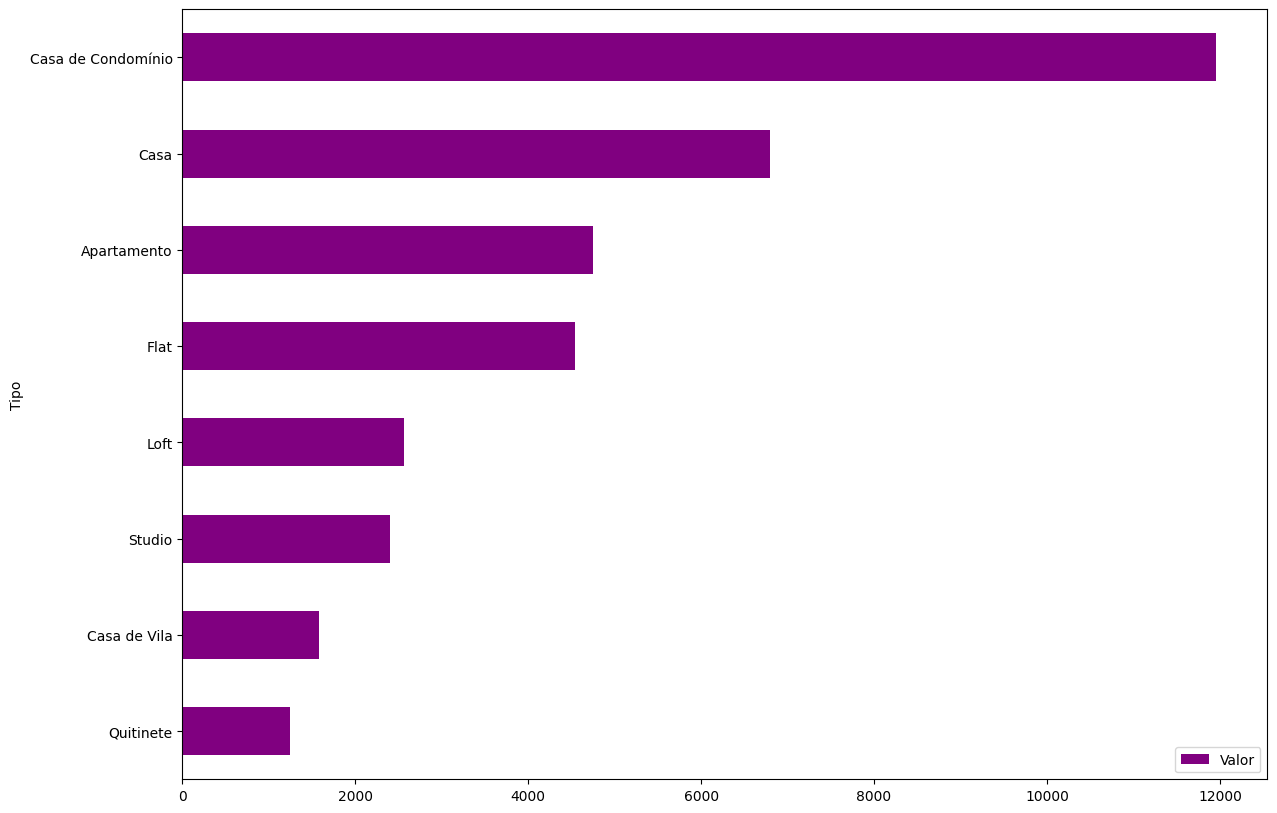

In [141]:
df_preco_tipo = df_dados_remove.groupby("Tipo")[["Valor"]].mean().sort_values("Valor")

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

In [145]:
# imoveis que possuem mais de uma suite
df.query('Suites >=1')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [148]:
df_dados_remove['Tipo']

0          Quitinete
1               Casa
3        Apartamento
4        Apartamento
5        Apartamento
            ...     
32953    Apartamento
32955      Quitinete
32956    Apartamento
32957    Apartamento
32958    Apartamento
Name: Tipo, Length: 23111, dtype: object

In [149]:
df_dados_remove['Tipo'].value_counts()

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [150]:
df_dados_remove['Tipo'].value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [151]:
type(df_dados_remove['Tipo'].value_counts(normalize=True))

pandas.core.series.Series

In [152]:
df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


In [153]:
df_percentual_tipo = df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('proportion')

In [154]:
df_percentual_tipo

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [155]:
df_dados_remove.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [156]:
df_dados_remove.Tipo.value_counts()

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [157]:
df_dados_remove.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [158]:
df_dados_remove.Tipo.value_counts(normalize=True).to_frame()

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


In [159]:
df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


In [160]:
df_dados_remove.shape

(23111, 9)

In [161]:
df_percentual_tipo.shape

(8, 1)

In [162]:
df_percentual_tipo = df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

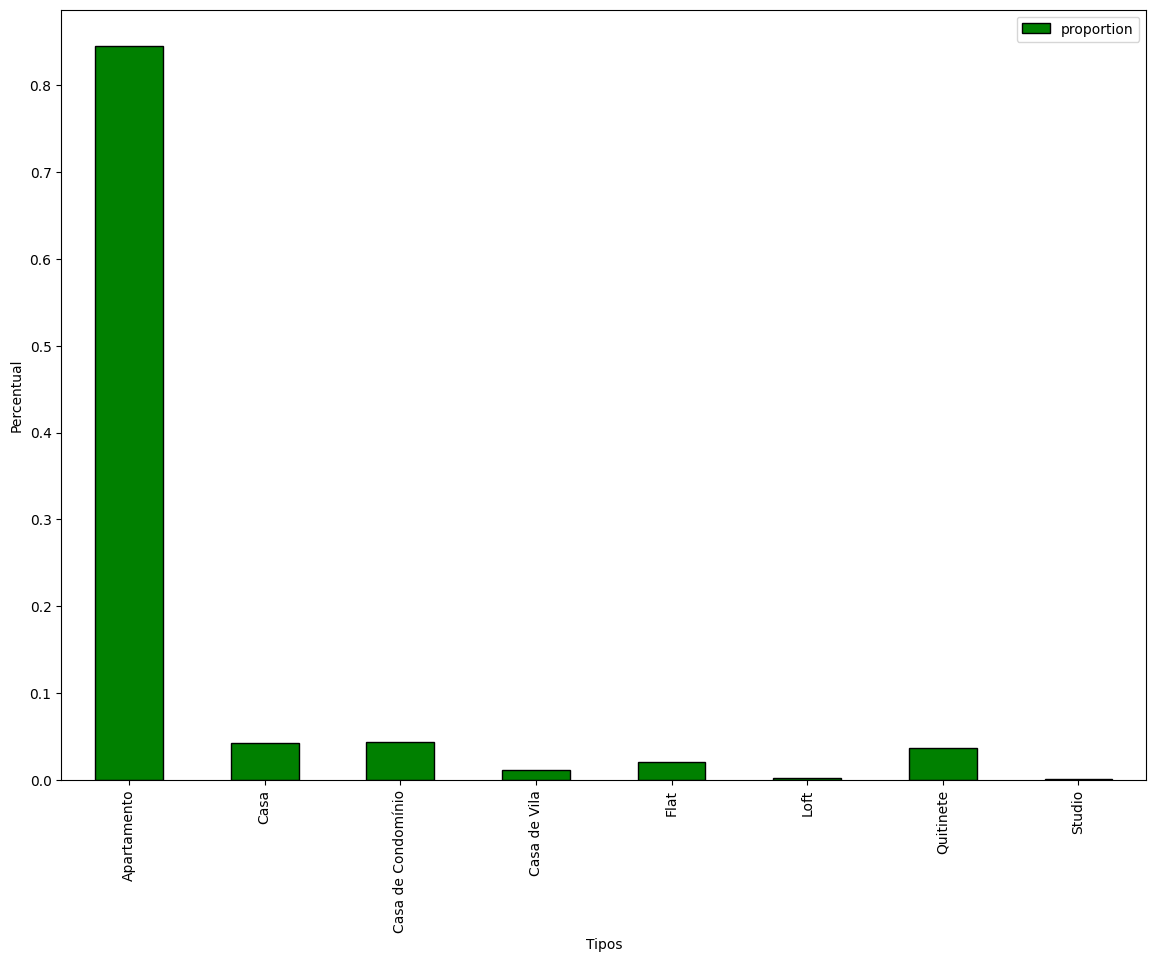

In [163]:
df_percentual_tipo = df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color ='green', edgecolor='black',
                        xlabel = 'Tipos', ylabel = 'Percentual');

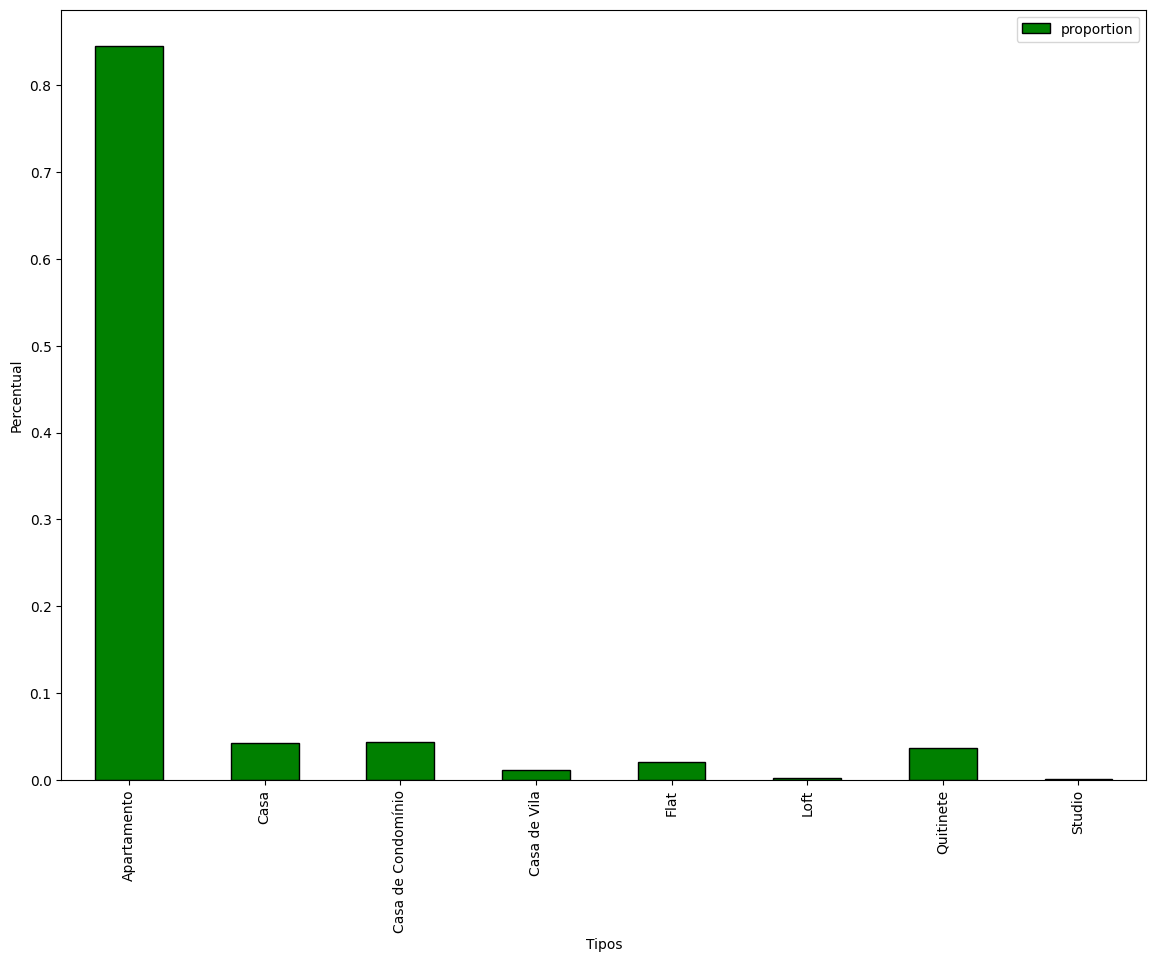

In [164]:
df_percentual_tipo = df_dados_remove['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color ='green', edgecolor='black',
                        xlabel = 'Tipos', ylabel = 'Percentual');

Faz sentido manter os outros tipos de imóveis na nossa base de dados? Casas e apartamentos do Rio de Janeiro possuem características muito distintas. Consequentemente, os preços dos aluguéis desses imóveis também variam bastante, como notamos na análise anterior.

Considerando isso e que os apartamentos representam a maior parte da nossa base de dados, faz sentido trabalharmos apenas com os imóveis do tipo apartamento.

Então, vamos selecionar apenas os imóveis do tipo apartamento e trabalhar apenas com eles daqui para frente.

### **Selecionando apenas os imóveis do tipo apartamento**

In [165]:
df_dados_remove.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [166]:
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados
Lidando com dados nulos

In [181]:
df_dados_remove.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1865
IPTU          6879
dtype: int64

In [182]:
# nulos vamos preenher com zero
df_dados_remove.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [183]:
df = df_dados_remove.fillna(0)

In [184]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Obs.: Nenhuma das nossas colunas possuem valores nulos. Assim concluímos mais uma etapa do nosso projeto.

## Removendo registros

In [191]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32859,Casa,Campo Grande,1,0,0,50,600.0,0.0,0.0
32865,Casa de Vila,Pavuna,2,0,0,55,600.0,0.0,0.0
32893,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,0.0,0.0
32911,Casa,Bento Ribeiro,2,1,0,60,1400.0,0.0,0.0


In [192]:
df.query('Valor == 0 | Condominio == 0').index

Index([    1,     5,     7,     8,    10,    18,    31,    76,   113,   117,
       ...
       32732, 32739, 32778, 32804, 32809, 32859, 32865, 32893, 32911, 32931],
      dtype='int64', length=1872)

In [193]:
registros_a_remover = df.query('Valor == 0 | Condominio == 0').index

In [194]:
df.drop(registros_a_remover, axis=0, inplace=True)

In [195]:
df.Tipo.unique()

array(['Quitinete', 'Apartamento', 'Flat', 'Casa de Condomínio', 'Casa',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas